![](https://api.brandy.run/core/core-logo-wide)

# Data Cleaning

Para poder realizar un análisis sobre un conjunto de datos o modelarle con algun algoritmo de Machine Learning, es importante que tengamos nuestros lo más limpios y organizados posibles. Eso no solo nos dará más claridad sobre la información que esos datos transmiten, sino que también permitirá obtener mejores resultados en nuestros modelos, incluso con algoritmos más sencillos.

El mejor paso para mejores modelos es tener mejores datos, más que utilizar algorimos más elaborados.

## Common Problems

Lo primero de todo es que necesitamos identificar los problemas que enfrentaremos en un determinado dataset. Para eso, exploraremos nuestros datos utilizando diferentes herramientas para identificar los problemas más evidentes.

Aunque no podamos generalizarm pues cada dataset tendrás sus particularidades y sus próprios problemas, hay algunas procedimientos recorrentes que nos pueden servir de guias para esa investigación.

> ### Remove Unwanted observations
> Ambas la calidad y cantidad de datos son importantes para un mejor análisis o modelaje, por lo que debemos evitar descartar datos. Pero hay determinados datos que no queremos que estén en nuestro conjunto de datos finales, pues no favorecen y pueden incluso dañar nuestro trabajo. Eso datos pueden ser:
> #### - Duplicados
> Sea porque hayamos combinado datos de diferentes fuentes, hayamos colectado los datos de manera automatica (web scraping) o lo hayamos recibido así, los datos duplicados no nos dan información relevante, pues nos dicen dos veces exactamente lo mismo.
> #### - Datos Irrelevantes
> Puede ser que alguno o algunos de los datos presentes en nuestro dataset no estén relacionados con la materia de nuestro estudio. Por ejemplo: datos sobre melanomas si estamos estudiando el cancer de mama; datos de Francia si estamos modelando datos climáticos en la Península Ibérica; etc. A veces podemos separar esos datos antes de seguir con el proceso de limpieza, pero en otros casos hay que arreglar otros problemas antes de poder identificarles.
>
> ### Fix Structural Errors
> Sea en la própria colecta, en la transferencia, mantenimiento, o cualquier otra parte de la vida de esos datos desde su nacimiento hasta llegar a nosotros, pueden surgir problemas estructurales en el dataset. En general, eso es un problema más recorrente en las variables categóricas, como `typos` o insconsistencia en las etiquetas utilizadas, eso es, dos nombres diferentes para representar la misma cosa. Si en una columna describiendo tipos de materiales encontramos los siguientes terminos: "asfalto", "Asfalto", "ASFALTO", "asphalt", "betún", "Hormigón asfáltico", etc. En realidad todos ellos se refieren a la misma cosa, por lo cual deberíamos padronizarles. 
>
> ### Filter Unwanted Outliers
> Nuestro reto en esa parte del proceso es identificar y saber valorar cuales outliers son prejudiciales al trabajo. Como dicho anteriormente, debemos ser reluctantes en descartar datos sin un motivo muy concreto.
>
> ### Handle Missing Data
> Quizás ese sea el mayor problema de los data scientists y que no tienen ningún consenso sobre la mejor manera de lidar con ellos, pero efectivamente no podemos simplemente ignorar los datos nulos que existan en un dataset. Las dos técnicas más comunes en ese aspecto son `eliminar los nulos`, que contradice el paradigma de que es mejor tener más datos, y `imputar valores para los nulos`, que contradice el deseo por la calidad, pues los datos que imputamos no son reales. Ese es el paradoxo del data cleaning.

En esa lección focaremos en los 2 primeros procedimientos arriba. En otra clase nos profundizaremos en los otros dos.

## Exploring the Data

In [2]:
import pandas as pd

df = pd.read_csv("../../../data/monster_com-job_sample.csv")

In [4]:
df.head(10)

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
0,United States of America,US,NaN,No,jobs.monster.com,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,http://jobview.monster.com/it-support-technici...,NaN,IT/Software Development,11d599f229a80023d2f40e7c52cd941e
1,United States of America,US,NaN,No,jobs.monster.com,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-e...,NaN,NaN,e4cbb126dabf22159aff90223243ff2a
2,United States of America,US,NaN,No,jobs.monster.com,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,http://jobview.monster.com/senior-training-lea...,NaN,NaN,839106b353877fa3d896ffb9c1fe01c0
3,United States of America,US,NaN,No,jobs.monster.com,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,http://jobview.monster.com/engineer-quality-jo...,NaN,Experienced (Non-Manager),58435fcab804439efdcaa7ecca0fd783
4,United States of America,US,NaN,No,jobs.monster.com,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,http://jobview.monster.com/shift-supervisor-pa...,NaN,Project/Program Management,64d0272dc8496abfd9523a8df63c184c
5,United States of America,US,NaN,No,jobs.monster.com,Job Description Job #: 720298Apex Systems has...,Construction PM - Charlottesville Job in Charl...,Full Time Employee,"Charlottesville, VA",Computer/IT Services,http://jobview.monster.com/construction-pm-cha...,NaN,Experienced (Non-Manager),1e2637cb5f7a2c4615a99a26c0566c66
6,United States of America,US,NaN,No,jobs.monster.com,Report this job About the Job Based in San Fra...,CyberCoders Job Application for Principal QA E...,"Full Time, Employee",Contact name Tony Zerio,Computer Software,http://jobview.monster.com/principal-qa-engine...,NaN,NaN,455802d725fde67293970ab3953b1d39
7,United States of America,US,NaN,No,jobs.monster.com,RESPONSIBILITIES:Kforce has a client seeking a...,Mailroom Clerk Job in Austin,Full Time Employee,"Austin, TX 73301",NaN,http://jobview.monster.com/mailroom-clerk-job-...,NaN,Experienced (Non-Manager),549a0541e4452ecd155efc032aaa72d7
8,United States of America,US,NaN,No,jobs.monster.com,"Part-Time, 4:30 pm - 9:30 pm, Mon - Fri Brookd...",Housekeeper Job in Austin,Part Time Employee,"Austin, TX 78746",Hotels and Lodging Personal and Household Serv...,http://jobview.monster.com/housekeeper-job-aus...,NaN,Customer Support/Client Care,a6a2b5e825b8ce1c3b517adb2497c5ed
9,United States of America,US,NaN,No,jobs.monster.com,"Insituform Technologies, LLC, an Aegion compan...",Video Data Management /Transportation Technici...,NaN,"Chesterfield, MO",NaN,http://jobview.monster.com/video-data-manageme...,NaN,NaN,73a9ba2b706e02628fa22ca1357174b1


### How big is our dataset?

In [5]:
df.shape

(22000, 14)

In [9]:
df.columns

Index(['country', 'country_code', 'date_added', 'has_expired', 'job_board',
       'job_description', 'job_title', 'job_type', 'location', 'organization',
       'page_url', 'salary', 'sector', 'uniq_id'],
      dtype='object')

In [16]:
df.duplicated(subset=['country', 'country_code', 'job_board',
       'job_description', 'job_title', 'job_type', 'location', 'organization',
       'salary', 'sector']).sum()

1169

In [17]:
df[df.duplicated(subset=['job_title', 'job_type', 'location'], keep=False)].sort_values(by=['job_title', 'job_type', 'location']).head()

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
2629,United States of America,US,NaN,No,jobs.monster.com,Job Title #317 Chattanooga Co-Manager Auto req...,# Chattanooga Co-Manager Job in Chattanooga,Full Time Employee,"Chattanooga, TN 37421",Retail,http://jobview.monster.com/317-chattanooga-co-...,NaN,Retail,c5358d87106ef1a20a0a95a92795312b
15753,United States of America,US,NaN,No,jobs.monster.com,Job Title #317 Chattanooga Co-Manager Auto req...,# Chattanooga Co-Manager Job in Chattanooga,Full Time Employee,"Chattanooga, TN 37421",Retail,http://jobview.monster.com/317-chattanooga-co-...,NaN,Retail,4e38171ed13d286880936769afdc4e68
795,United States of America,US,NaN,No,jobs.monster.com,Job Title #720 Plano Retail Co-Manager Auto re...,# Plano Retail Co-Manager Job in Plano,Full Time Employee,"Plano, TX 75093",Retail,http://jobview.monster.com/720-plano-retail-co...,NaN,Retail,000d6b27ca3019e5a8c36e021fd6a188
11354,United States of America,US,NaN,No,jobs.monster.com,Job Title #720 Plano Retail Co-Manager Auto re...,# Plano Retail Co-Manager Job in Plano,Full Time Employee,"Plano, TX 75093",Retail,http://jobview.monster.com/720-plano-retail-co...,NaN,Retail,d8503658d538c95b28a0e437c7200955
3806,United States of America,US,NaN,No,jobs.monster.com,Is in need of an experienced RN supervisor wit...,./hr Experienced RN supervisor (Smithtown) Job...,Full Time,"Smithtown, NY 11787",Healthcare Services,http://jobview.monster.com/40-00-hr-Experience...,40.00 - 40.00 $ /year,Manager (Manager/Supervisor of Staff),2c594aad12dc6ae51125bff47d6c6e9a


In [19]:
df = df.drop_duplicates(subset=['country', 'country_code', 'job_board','job_description',
                                'job_title', 'job_type', 'location', 'organization',
                                'salary', 'sector'])

### How many nulls are there?

In [21]:
df.shape

(20831, 14)

In [20]:
df.isna().sum()

country                0
country_code           0
date_added         20713
has_expired            0
job_board              0
job_description        0
job_title              0
job_type            1521
location               0
organization        6605
page_url               0
salary             17532
sector              4923
uniq_id                0
dtype: int64

In [23]:
100*df.isna().sum()/df.shape[0]

country             0.000000
country_code        0.000000
date_added         99.433537
has_expired         0.000000
job_board           0.000000
job_description     0.000000
job_title           0.000000
job_type            7.301618
location            0.000000
organization       31.707551
page_url            0.000000
salary             84.163026
sector             23.633047
uniq_id             0.000000
dtype: float64

### What should we do if a feature (column) is almost all or majorly composed of nulls?

No hay una respuesta definitiva. Debemos averiguar cual es la relevancia de esa feature, si hay posibilidad de recuperar esos datos por otra columna o alguna ontra fuente de datos, etc.

En el caso de la columna `date_added` arriba que es casi 100% nula no parece que podríamos recuperar esos datos.

### How are nulls distributed?

<AxesSubplot:>

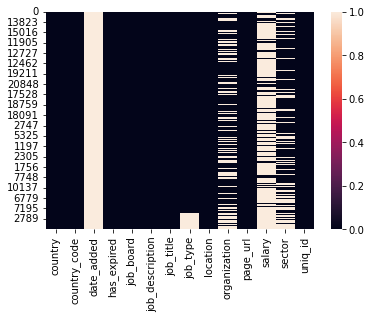

In [25]:
import seaborn as sns

sns.heatmap(df.isnull().sort_values(by="job_type"))

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20831 entries, 0 to 21999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   country          20831 non-null  object
 1   country_code     20831 non-null  object
 2   date_added       118 non-null    object
 3   has_expired      20831 non-null  object
 4   job_board        20831 non-null  object
 5   job_description  20831 non-null  object
 6   job_title        20831 non-null  object
 7   job_type         19310 non-null  object
 8   location         20831 non-null  object
 9   organization     14226 non-null  object
 10  page_url         20831 non-null  object
 11  salary           3299 non-null   object
 12  sector           15908 non-null  object
 13  uniq_id          20831 non-null  object
dtypes: object(14)
memory usage: 2.4+ MB


### A little more information

In [27]:
df.describe()

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
count,20831,20831,118,20831,20831,20831,20831,19310,20831,14226,20831,3299,15908,20831
unique,1,1,77,1,1,18744,18759,39,8423,738,20831,1737,163,20831
top,United States of America,US,9/22/2016,No,jobs.monster.com,12N Horizontal Construction Engineers Job Desc...,Monster,Full Time,"Dallas, TX",Healthcare Services,http://jobview.monster.com/it-support-technici...,"40,000.00 - 100,000.00 $ /year",Experienced (Non-Manager),11d599f229a80023d2f40e7c52cd941e
freq,20831,20831,4,20831,20831,104,300,6428,596,1776,1,50,4299,1


Las columnas `country`, `country_code`, `has_expired` y `job_board` no tienen nulos, pero tienen el mismo valor constante en todas las filas, por lo cual no nos dice ninguna información relevante. Para Machine Learning, no trarian ningún valor a nuestro modelo.

Igualmente, podemos ver que tenemos 2 columnas que tampoco tienen nulos, pero tienen valores únicos en todas las filas. Una de ellas es un `id`, podemos hacer que esa columna sea el id de nuestro dataframe.

Variables categóricas que solo posén valores únicos no añaden nada al modelo además de complejidad y ruido.
Si fuera una variable numerica todo dependeria de las correlaciones.

Para lo que si sería útil tener esas urls es para hacer `web scraping` (recogida de datos de páginas web) caso pudieramos extraer datos complementários de esas webs.

In [29]:
df = df.drop(columns=['country', 'country_code', 'date_added', 'has_expired', 'job_board',
                      'page_url'])

In [30]:
df = df.set_index("uniq_id")

In [31]:
df.head()

,job_description,job_title,job_type,location,organization,salary,sector
uniq_id,,,,,,,
11d599f229a80023d2f40e7c52cd941e,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,NaN,IT/Software Development
e4cbb126dabf22159aff90223243ff2a,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,NaN,NaN
839106b353877fa3d896ffb9c1fe01c0,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,NaN,NaN
58435fcab804439efdcaa7ecca0fd783,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,NaN,Experienced (Non-Manager)
64d0272dc8496abfd9523a8df63c184c,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,NaN,Project/Program Management


### Checking out the columns

In [32]:
df.describe()

,job_description,job_title,job_type,location,organization,salary,sector
count,20831,20831,19310,20831,14226,3299,15908
unique,18744,18759,39,8423,738,1737,163
top,12N Horizontal Construction Engineers Job Desc...,Monster,Full Time,"Dallas, TX",Healthcare Services,"40,000.00 - 100,000.00 $ /year",Experienced (Non-Manager)
freq,104,300,6428,596,1776,50,4299


In [33]:
df["job_type"].unique()

array(['Full Time Employee', 'Full Time', 'Full Time, Employee',
       'Part Time Employee', nan, 'Full Time Temporary/Contract/Project',
       'Full Time , Employee', 'Full Time, Temporary/Contract/Project',
       'Employee', 'Part Time', 'Part Time, Employee', 'Full Time Intern',
       'Temporary/Contract/Project', 'Full Time / Employee',
       'Full Time , Temporary/Contract/Project',
       'Part Time, Temporary/Contract/Project', 'Full Time/ Employee',
       'Per Diem, Employee', 'Job Type Full Time Employee', 'Per Diem',
       'Full Time\xa0', 'Part Time Intern', 'Per Diem Employee',
       'Part Time/ Temporary/Contract/Project',
       'Part Time Temporary/Contract/Project', 'Exempt',
       'Part Time , Temporary/Contract/Project', 'Full Time\xa0 Employee',
       'Part Time Seasonal', 'Part Time , Employee', 'Job Type Employee',
       'Job Type Full Time Temporary/Contract/Project',
       'Full Time / > Employee', 'Part Time\xa0',
       'Per Diem, Temporary/Contract

In [36]:
def extract(x,dic):
    for k,v in dic.items():
        if k.lower() in str(x).lower():
            return v
    return x

In [39]:
df["time"] = df["job_type"].apply(extract, dic = {"Full Time":"Full", "Part Time":"Part", "Per Diem": "Hourly"})
df["time"].value_counts()

Full                          18020
Part                            891
Temporary/Contract/Project      185
Employee                        146
Hourly                           66
Exempt                            1
Job Type Employee                 1
Name: time, dtype: int64

In [43]:
df["contract"] = df["job_type"].apply(extract, dic = {
                                                        "Employee":"Employee",
                                                        "Temporary":"Temp",
                                                        "Contract":"Temp",
                                                        "Project":"Temp",
                                                        "Seasonal":"Temp",
                                                        "Per Diem":"Temp",
                                                        "Intern":"Intern"
                                                                })

In [44]:
df["contract"].value_counts()

Employee              10695
Full Time              6428
Temp                   1843
Part Time               318
Full Time                14
Intern                    8
Job Type Full Time        2
Exempt                    1
Part Time                 1
Name: contract, dtype: int64

In [50]:
new = df[~df["time"].isin(["Full","Part","Hourly"])]["job_description"].apply(extract, dic = {"Full Time":"Full", 
                                                                                        "Part Time":"Part", 
                                                                                        "Per Diem": "Hourly"})

In [55]:
new = new[new.isin(["Full","Part","Hourly"])]

In [56]:
new.value_counts()

Full      128
Part       28
Hourly      2
Name: job_description, dtype: int64

In [58]:
df.loc[new.index, "time"]

uniq_id
2370aab27692f04cc251015c78207116                      Employee
a758cc26350eff9cc7797e85fac4cac4                           NaN
cbdf4f25981662c48188543bfb112838    Temporary/Contract/Project
f1724ebc6f7a391fbd22cada3c0bc089                      Employee
7ca9ad7e1f411c18908f537d246b9460                      Employee
                                               ...            
5433248524eb3f7242fad195c0b4d3ad                           NaN
86121159c293fa98d62978b7017cabca                           NaN
fbf1ae1cea49bcf96bb571a08043fd96                           NaN
3b8fe78e102c1d5ae8bcf60f5ee8cb5c                      Employee
255877c1180a5c6ce9ea49d8afd25317                           NaN
Name: time, Length: 158, dtype: object

In [59]:
df.loc[new.index, "time"]  = new

In [60]:
df["time"].value_counts()

Full                          18148
Part                            919
Temporary/Contract/Project      177
Employee                        121
Hourly                           68
Exempt                            1
Job Type Employee                 1
Name: time, dtype: int64